In [1]:
from BufferGeometry import BufferGeometry
import numpy as np

In [2]:
import math
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from scipy import linalg as la

# Initialize tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()
text = "The sky is the"
inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs.input_ids

# Forward pass with hidden states
with torch.no_grad():
    outputs = model(input_ids, output_hidden_states=True, return_dict=True)

hidden_states = outputs.hidden_states  # Tuple: [embedding] + [each layer output]

/home/william/anaconda3/envs/python3_env/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
2025-05-19 17:50:03.850157: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-19 17:50:03.937500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
np.shape(hidden_states)
buffer_states = np.array([layer.squeeze(0).numpy() for layer in hidden_states])


buffer_states.shape

(13, 4, 768)

In [4]:
#class test

bg = BufferGeometry(buffer_states[-1,:,:])

In [5]:
#cosine sim

bg.cosine_similarity(buffer_states[-1,:,:])

array([[0.99999994]], dtype=float32)

In [ ]:
bg2 = BufferGeometry(buffer_states[12,:,:])

IndexError: index 13 is out of bounds for axis 0 with size 13

In [13]:
bg2.volume()

4699410.5

In [ ]:
volumes = []
for i in range(buffer_states.shape[0]):
    bg = BufferGeometry(buffer_states[i,:,:])
    volumes.append(bg.volume())

    


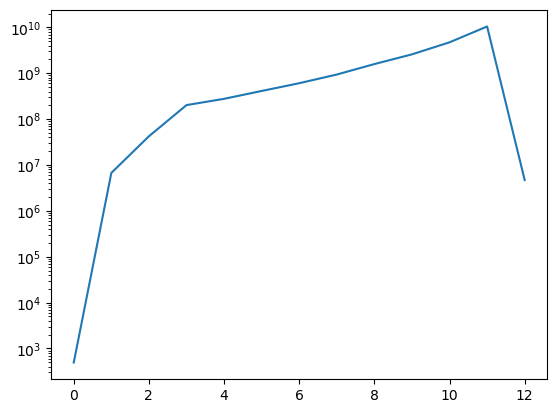

In [15]:
plt.plot(range(len(volumes)),volumes)
plt.yscale("log")

In [ ]:
grassman_d = []
for i in range(buffer_states.shape[0]-1):
    """
    Qui ci va una parte di riduzione di dimensionalità
    """
    
    bg = BufferGeometry(buffer_states[i+1,:,:])
    grassman_d.append(bg.grassmann_distance(buffer_states[i,:,:]))

    


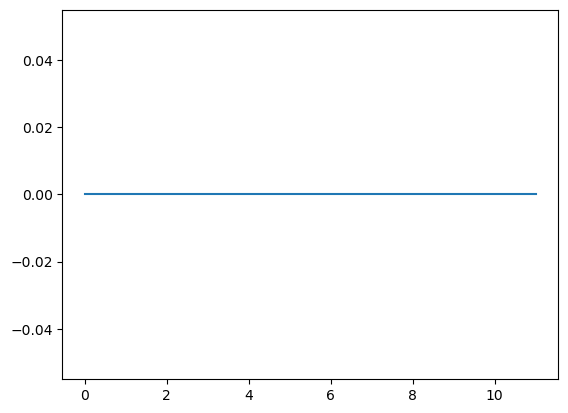

In [20]:
print(grassman_d)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
